# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

In [4]:
Name: FengyiXiao  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1002956232

SyntaxError: invalid syntax (<ipython-input-4-88aacdfb7f2a>, line 1)

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [5]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [6]:
import pandas as pd
import numpy as np

#print(dataset.data)
#print(dataset.target)
#print(dataset.feature_names)
#print(dataset.target_names)
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df['Target'] = pd.Series(data=dataset.target, index=df.index)

# mean_area_count = df['mean area'] >700
#sum(mean_area_count)
#sum(df.Target)

from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




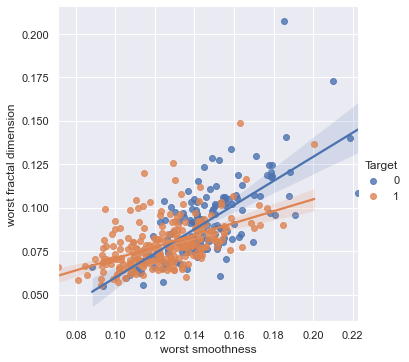

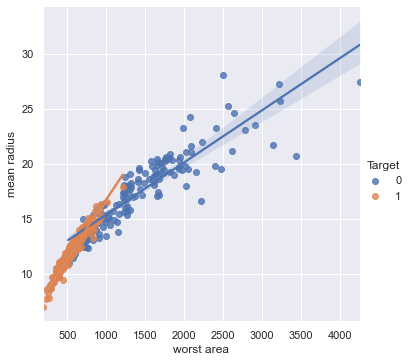

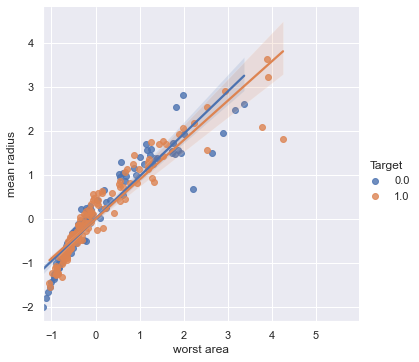

In [7]:
### YOUR CODE HERE ###
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Train_set = pd.concat([X_train, y_train],axis = 1)

g1 = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="Target", data=Train_set)
g2 = sns.lmplot(x= "worst area", y="mean radius", hue="Target", data=Train_set)

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_scaled,columns=dataset.feature_names)
Train_scaled = pd.concat([X_train_scaled, y_train],axis = 1)

g3 = sns.lmplot(x="worst area", y="mean radius", hue="Target", data=Train_scaled)

#After standardization, the mean is close to 0 and the variance is close to 1. It increase the data quality so
# it helps us to reduce error and make better perdiction


## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




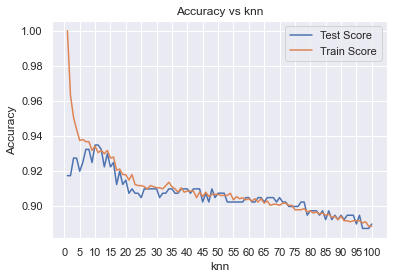

Max Mean Validation Accuracy: 0.9346518987341772
Best Knn Value: 10


In [8]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#knn = neighbors.KNeighborsClassifier(n_neighbors=1)

#accuracy = accuracy_score(y_train, knn.predict(X_train))
#scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)

#print('Mean Train Accuracy:',scores['train_score'].mean()) # returns the mean cross-validation train score
#print('Mean Validation Accuracy:', scores['test_score'].mean()) # returns the mean cross-validation validation score

Test_accuracy_lst = []
Train_accuracy_lst = []
knn_val = [i for i in range(1,101)]
max_acc = 0
max_k = 0
for i in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors= i)
    scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
    train_score = scores['train_score'].mean()
    test_score = scores['test_score'].mean()
    Test_accuracy_lst.append(test_score)
    Train_accuracy_lst.append(train_score)
    if max_acc < test_score:
        max_acc = test_score
        max_k = i
    

plt.plot(knn_val,Test_accuracy_lst, label = 'Test Score')
plt.plot(knn_val,Train_accuracy_lst, label = 'Train Score')
plt.title('Accuracy vs knn')
plt.xlabel('knn')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,101,5))
plt.show()
print('Max Mean Validation Accuracy:', max_acc) 
print('Best Knn Value:', max_k) 


In [9]:
#Q3: from the graph above, we can see that when knn value is in [0,10],[13,37],[53,57],the Test Score
# is under the Train score, so these k lead to underfitted model.
#When the knn value is in [11,12],[38,52],[58,100],the Test Score
#is above the Train score, so these k lead to overfitted model.

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X = df[df.columns[:-1]]
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

def Feature_selector (X_train , y_train , tr=0.95):
    #Full Feature Accuracy
    full_max_acc = 0
    full_max_k = 0
    for f in range(1,101):
        knn = neighbors.KNeighborsClassifier(n_neighbors= f)
        scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
        test_score = scores['test_score'].mean()
        if full_max_acc < test_score:
            full_max_acc = test_score
            full_max_k = f
    condition = tr * full_max_acc
    
    #Loop to meet the condition
  
    new_X = X_train
    
    remove_fea = ["Full Feature"] #list of the removed feature
    best_Acc = [full_max_acc]
    best_k = [full_max_k]
    num_fea_lst = [30]
    while len(list(new_X.columns)) > 1 or max_acc >= condition:
        dt = tree.DecisionTreeClassifier(random_state=0)
        dt.fit(new_X,y_train)
        importance = dt.feature_importances_
#        print(importance)
        min_impo = float('inf')
        
        fea_lst=list(new_X.columns)
               
        #Find the least importance feature
        for i,v in enumerate(importance):
            if min_impo > v:
                min_impo = v
                least_feature = fea_lst[i]
        remove_fea.append(least_feature)
#        print(least_feature)
#        print(remove_fea)
        new_X = new_X.drop(columns = least_feature,axis=1)
        
         #KNN Model
#        Test_accuracy_lst = []
        max_k = 0
        max_acc = 0
        for u in range(1,101):
            knn = neighbors.KNeighborsClassifier(n_neighbors= u)
            scores = cross_validate(knn, new_X, y_train, cv=5,return_train_score=True)
            test_score = scores['test_score'].mean()
#            Test_accuracy_lst.append(test_score)
            if max_acc < test_score:
                max_acc = test_score
                max_k = u
        best_Acc.append(max_acc)
        best_k.append(max_k)
        fea_num = len(list(new_X.columns))
        num_fea_lst.append(fea_num)
#        print(fea_num)
        
        if fea_num == 1:
            break    # break here
        
    return remove_fea,best_Acc,best_k

    
#Feature_selector (X_train , y_train , tr=0.95)   
remove_fea_train,best_Acc_train,best_k_train = Feature_selector (X_train , y_train , tr=0.95)


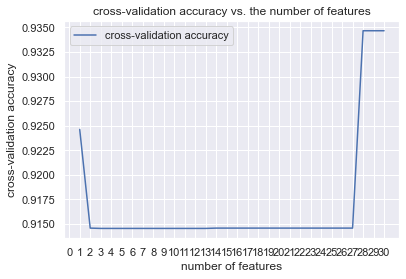

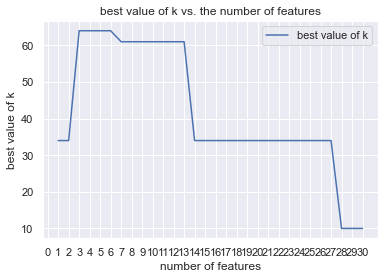

In [16]:
#cross-validation accuracy (with a tuned k on y axis) vs. the number of features plot
feature_num = [i for i in range(30,0,-1)]
plt.plot(feature_num,best_Acc_train, label = 'cross-validation accuracy')
plt.title('cross-validation accuracy vs. the number of features')
plt.xlabel('number of features')
plt.ylabel('cross-validation accuracy')
plt.legend()
plt.xticks(np.arange(0,31,1))
plt.show()

#Plot the best value of k (y-axis) vs. the number of features
plt.plot(feature_num,best_k_train, label = 'best value of k')
plt.title('best value of k vs. the number of features')
plt.xlabel('number of features')
plt.ylabel('best value of k')
plt.legend()
plt.xticks(np.arange(0,31,1))
plt.show()

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [17]:
### YOUR CODE HERE ###
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_Test_scaled = scaler.transform(X_test)
X_std_scaled = pd.DataFrame(data=X_train_scaled,columns=dataset.feature_names)

In [20]:
remove_fea_scale,best_Acc_scale,best_k_scale = Feature_selector (X_std_scaled , y_train , tr=0.95)

KeyboardInterrupt: 

In [ ]:
plt.plot(feature_num,best_Acc_train, label = 'cross-validation accuracy original')
plt.plot(feature_num,best_Acc_scale, label = 'cross-validation accuracy standarized')
plt.title('cross-validation accuracy (standardized data and original) vs. the number of features')
plt.xlabel('number of features')
plt.ylabel('cross-validation accuracy')
plt.legend()
plt.xticks(np.arange(0,31,1))
plt.show()


In [ ]:
#standardization really helps my model and its performance since the overall cv accuracy have been significantly
#increased. when the number of features is 10, the cv accurary reachs the highest value.

print('the features we removed are:',remove_fea_scale[:11])
print('the best k value here is',best_k_scale[11])

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [19]:
### YOUR CODE HERE ###
knn_61 = neighbors.KNeighborsClassifier(n_neighbors=61)
scores = cross_validate(knn_61, X_std_scaled, y_train, cv=5, return_train_score=True)

print('Mean Train Accuracy:',scores['train_score'].mean()) # returns the mean cross-validation train score
print('Mean Validation Accuracy:', scores['test_score'].mean())

knn_61.fit(X_std_scaled, y_train)
accuracy = accuracy_score(y_test, knn_61.predict(X_Test_scaled))
print ("Test set accuracy: ", accuracy * 100, "%")

Mean Train Accuracy: 0.9315392046686777
Mean Validation Accuracy: 0.9271518987341771
Test set accuracy:  94.15204678362574 %


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/